<a href="https://colab.research.google.com/github/aristriana/KI_Tasks/blob/main/MidtermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Aristriana Muhamad<br>
NPM: 2106709043

In [1]:
# Install PyTorch with GPU support (CUDA)
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118

# Install OpenCV for handling video files
!pip install opencv-python

# Clone YOLOv5 repository from GitHub, which includes YOLOv5 model files and utilities
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.61 MiB | 20.11 MiB/s, done.
Resolving deltas: 100% (11690/11690), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 15.1 MB/s eta 0:00:00


##**Upload Video File and Load Pre-trained YOLOv5 Model**<br>
Video source: https://www.kaggle.com/code/gabrielvinicius/pedistrian-crooswalk-detection-yolo-v8-sahi/output?select=predestrian_walk.mp4

In [2]:
!gdown 1Z06eqt7kurs9FrF_s9pf3tnNibo_aF4g

Downloading...
From: https://drive.google.com/uc?id=1Z06eqt7kurs9FrF_s9pf3tnNibo_aF4g
To: /content/yolov5/predestrian_walk.mp4
100% 3.26M/3.26M [00:00<00:00, 142MB/s]


In [3]:
video_path = '/content/yolov5/predestrian_walk.mp4'

In [4]:
import torch

# Load YOLOv5 model (e.g., yolov5s) pretrained on COCO dataset
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-11-2 Python-3.10.12 torch-2.5.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 110MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


##**Detect Objects Frame by Frame and Extract Relevant Information**

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

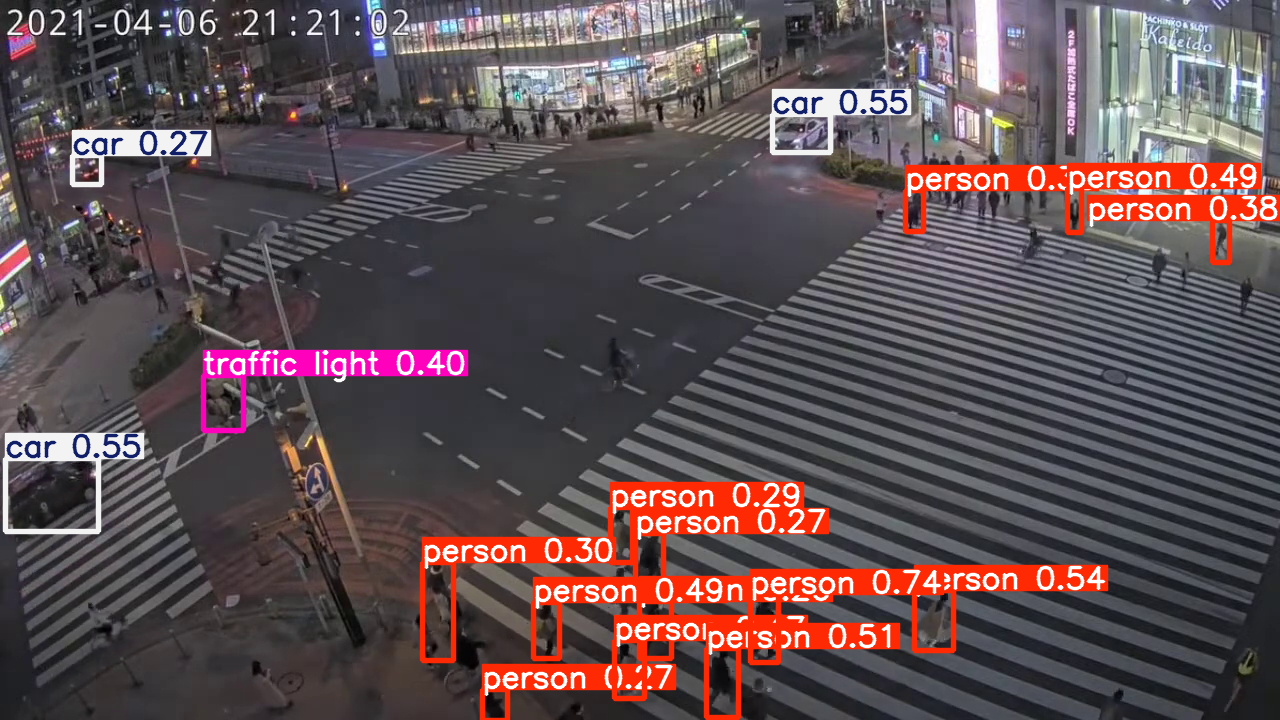

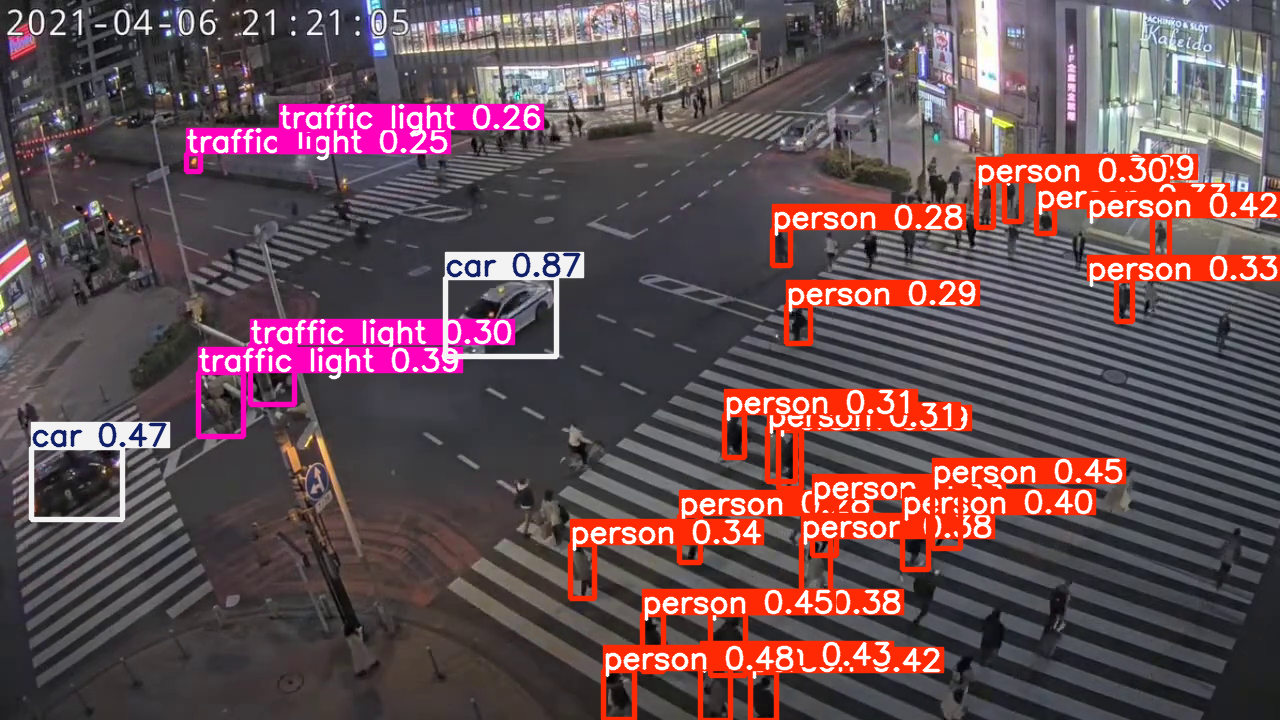

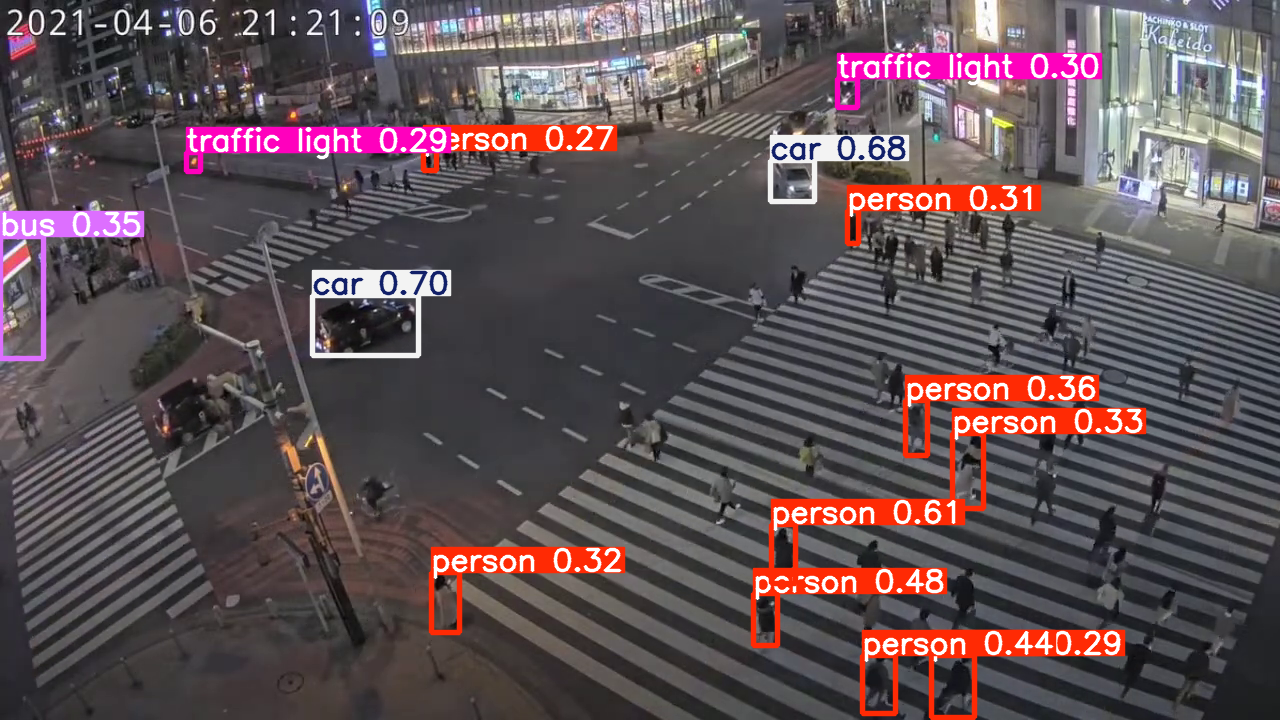

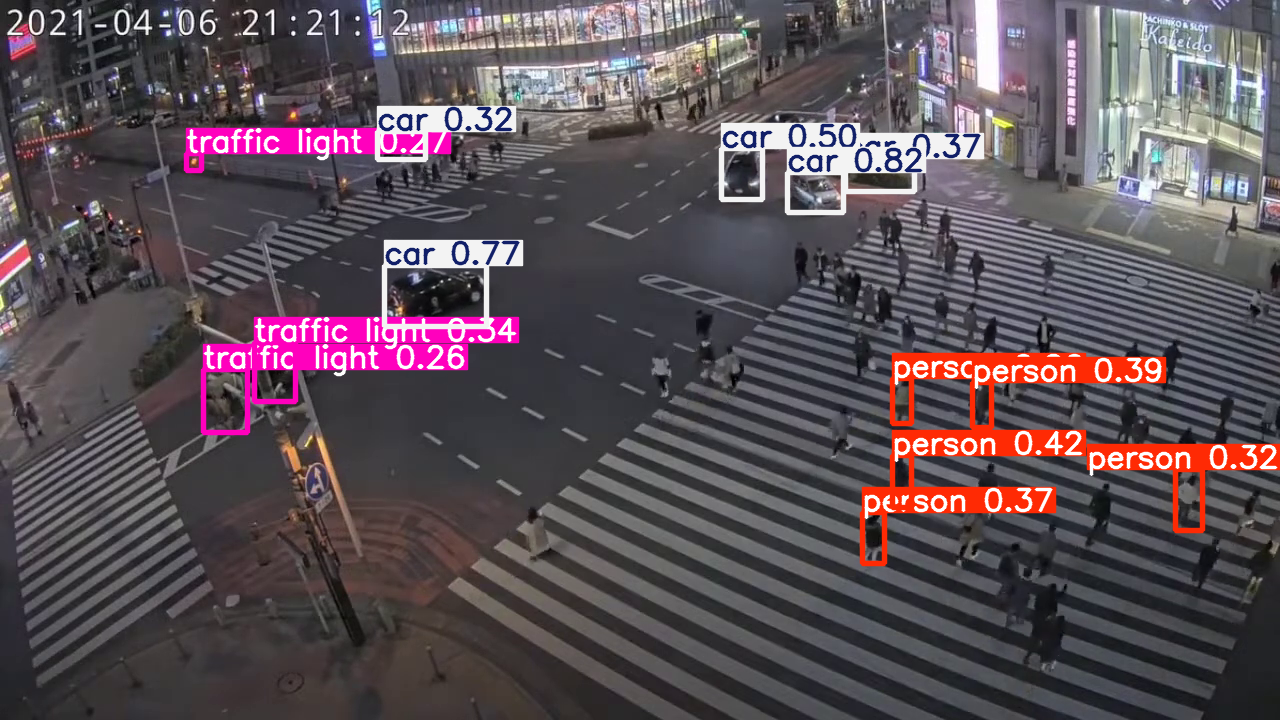

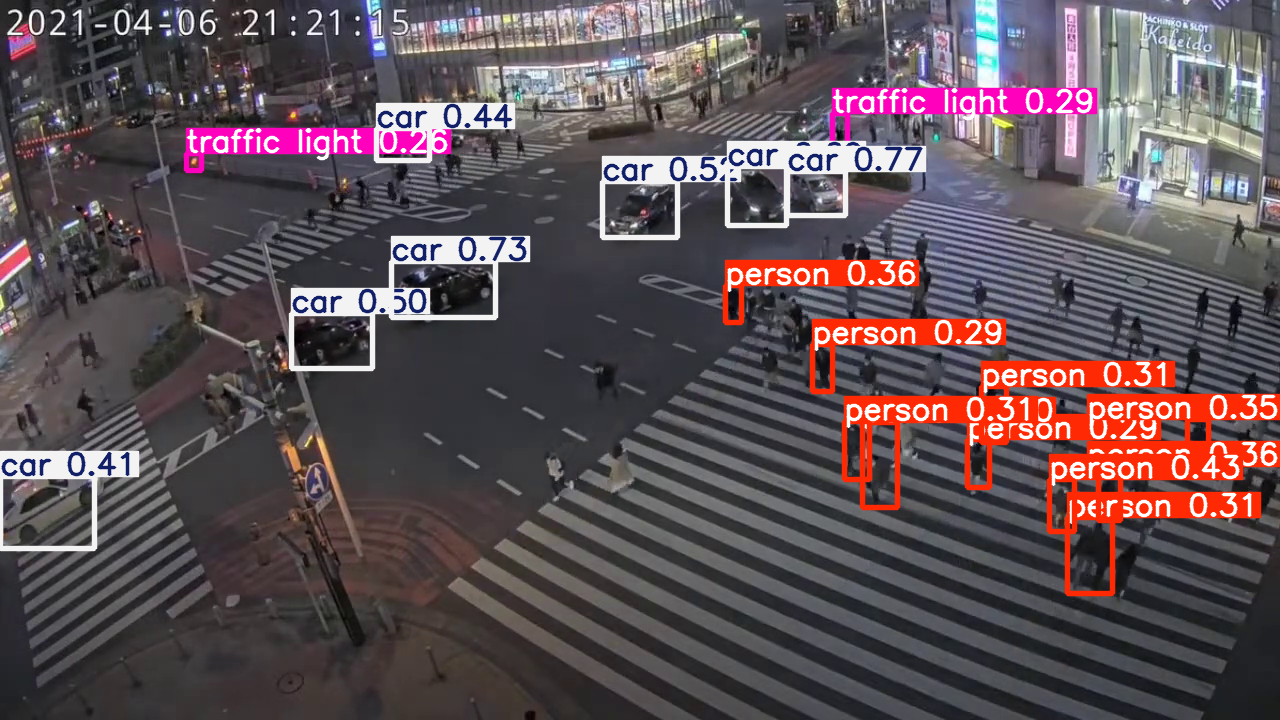

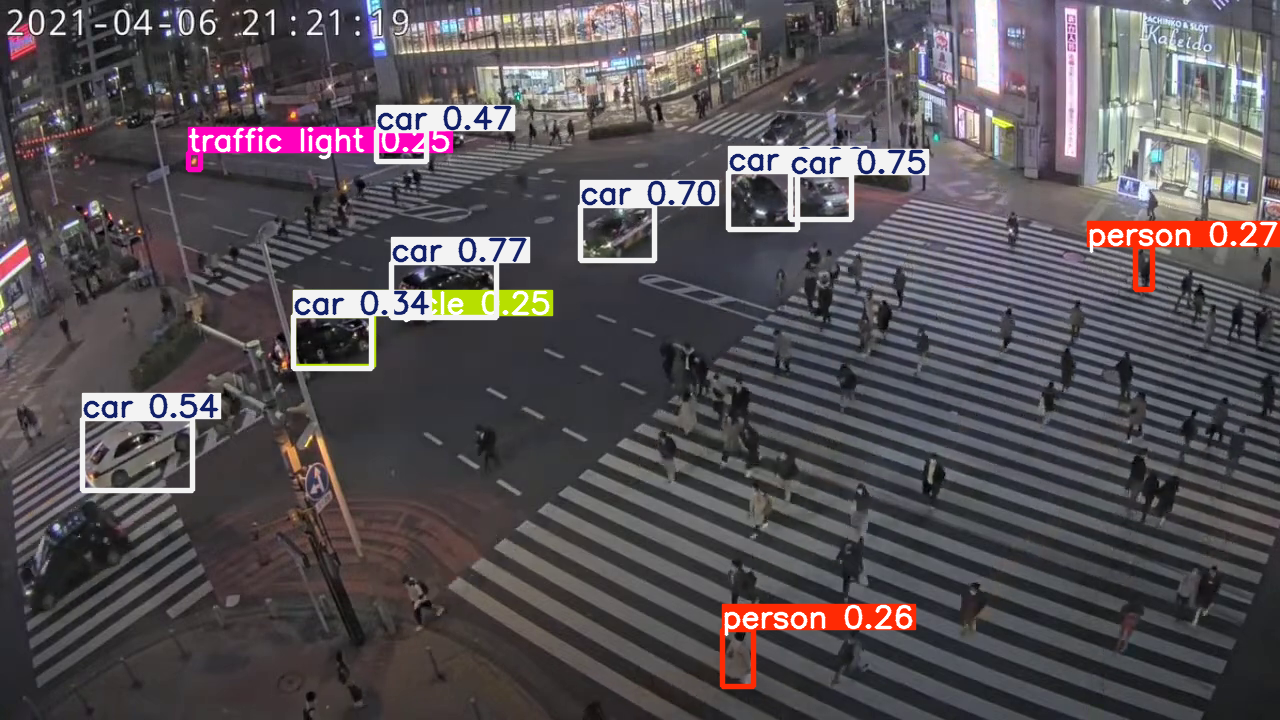

In [5]:
import cv2
from google.colab.patches import cv2_imshow

# Load the video file
cap = cv2.VideoCapture(video_path)

# Save frames to a list for later processing
frames = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection
    results = model(frame)
    frame = results.render()[0]
    frames.append(frame)  # Store processed frames
cap.release()

# View processed frames
for i, frame in enumerate(frames):
    if i % 100 == 0:  # Display every 100th frame
        cv2_imshow(frame)

##**Extract Video**

In [7]:
import cv2
import torch

# Load YOLO model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Set input and output video paths
input_video_path = '/content/yolov5/predestrian_walk.mp4'
output_video_path = '/content/output_with_detections.mp4'  # Save in Colab's root directory

# Open input video
cap = cv2.VideoCapture(input_video_path)

# Video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define codec and create VideoWriter for output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Process each frame and save output
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    frame = results.render()[0]
    out.write(frame)

cap.release()
out.release()

# Check if output video is saved
!ls -lh /content/output_with_detections.mp4

# Download the video
from google.colab import files
files.download('/content/output_with_detections.mp4')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-2 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning:

-rw-r--r-- 1 root root 29M Nov  2 14:23 /content/output_with_detections.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>